In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import cv2 as cv

In [12]:
def remap(img,x,y):
    """ a wrapper of opencv remap, adopted from 
    img:NxHxW, x:NxHxW ,y:NxHxW
    out:NxHxW
    Implement Scaling and Squaring
    https://github.com/yongleex/DiffeomorphicPIV/blob/main/deformpiv.py#L180
    """
    
    # convert x,y to grid:NxHxWx2
    grid = torch.stack((x, y), dim=-1)
    
    # normalize grid to (-1,1) for grid_sample
    # under pixel coordination system, x->W, y->H
    grid_shape = grid.shape[1:3]
    grid[:,:,:,0] = (grid[:,:,:,0] / (grid_shape[1] - 1) - 0.5)*2
    grid[:,:,:,1] = (grid[:,:,:,1] / (grid_shape[0] - 1) - 0.5)*2

    # shape img to NxCxHxW for grid_sample
    img = torch.unsqueeze(img, dim=1)
    out = F.grid_sample(img, grid, mode='bicubic', align_corners=True)
    
    return torch.squeeze(out, dim=1)

(6, 384, 512)


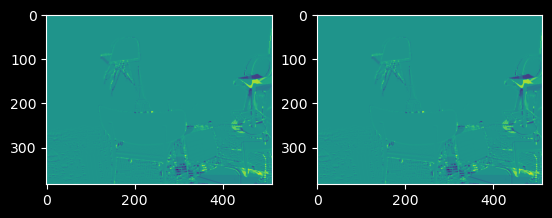

In [13]:
path1 = '/home/panding/code/UR/data-chair/00001_img1.npy'
path2 = '/home/panding/code/UR/data-chair/00001_img1.npy'
data1 = np.load(path1)
data2 = np.load(path2)
print(data1.shape)
data_tensor1 = torch.tensor(data1)
image1_1 = data1[0]
image1_2 = data1[1]
u1 = data1[2]
v1 = data1[3]

data_tensor2 = torch.tensor(data2)
image2_1 = data2[0]
image2_2 = data2[1]
u2 = data2[2]
v2 = data2[3]
# 使用Lee的方法
# image1_tensor, image2_tensor, u_tensor, v_tensor = data_tensor.split(1, 0)
# re = remap(image1_tensor, u_tensor, v_tensor)
# re = (re + image1_tensor)[0].numpy()
# # re_image = re.astype('uint8')

# # print(re_image.shape)
# # plt.imsave('111.png', re_image)
# print(re.shape)
# plt.imsave('111.png', re)

# 使用opencv的方法
x1, y1 = np.meshgrid(np.arange(u1.shape[1]), np.arange(v1.shape[0]))
x1 = np.float32(x1)
y1 = np.float32(y1)
re1 = cv.remap(image1_1, x1+u1, y1+v1, interpolation = 4)

x2, y2 = np.meshgrid(np.arange(u2.shape[1]), np.arange(v2.shape[0]))
x2 = np.float32(x2)
y2 = np.float32(y2)
re2 = cv.remap(image2_1, x2+u2, y2+v2, interpolation = 4)

plt.figure()
plt.subplot(121)
plt.imshow(re1)
plt.subplot(122)
plt.imshow(re2-image2_2)
plt.show()